#<center>Trabajo en grupo</center>



##<center>Práctica De Numpy</center>
\

<center>Judol Alejandro Rodríguez Franco
<center>Juan Sebastián Sierra Jaraba
<center>Universidad Nacional De Colombia
<center>Facultad De Ciencias

---
###<center>Abstract</center>

<center>Práctica de Numpy hecha con datos tomados de tracker. </center>

---


###<center><b>Taller

<b>El video adjunto muestra un carro que desciende por una rampa. Al analizar el video usando tracker se puede extraer información como la posición $\vec{r}=(x,y)$, la velocidad $\vec{v}=(v_x,v_y)$ y la aceleración $\vec{a}=(a_x,a_y)$ en función del tiempo. Estas últimas se hacen a partir de calcular derivadas numéricas sobre los datos, así que pueden tener mucho ''ruido''. El archivo adjunto muestra esas variables, a lo largo del plano, en función del tiempo. Los datos fueron guardados en formato ```.csv```.

Usted debe leer el archivo usando la función `genfromtxt`. En particular, preste atención a los argumentos `skip_headers`, `delimiter`, y  `missing_values`. En este caso queremos que a los `mising_values` se les asigne el tipo `np.nan`. Luego de hacerlo, tendrá el arreglo de numpy con los datos.

Una vez leídos los datos, debe usar la columna de tiempo $t$ y la de $x$ para hacer una figura de uno contra el otro y detectar desde cuándo inicia el movimiento. Llamaremos $t_0$ a ese tiempo. Luego realice una regresión no lineal sobre estos datos, en el intervalo de tiempo $t\geq t_0$ usando la función teórica $x(t)=x_0+v_{0x}t+\frac{a_{x}t^2}{2}$. De esto obtendrá valores y errores en la posición inicial $x_0$, la velocidad inicial $v_0$ y la aceleración $a_x$. Grafique los datos originales y la función con los parámetros obtenidos. 

Finalmente calcule el promedio de $a_x$ a partir de la tabla de datos y compárelo porcentualmente con lo obtenido en el fit


Para comenzar, alojamos el archivo en algún repositorio desde donde se pueda acceder a el, en este caso, una ubicación en Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Para leer el archivo .csv usamos la función `genfromtxt` de `numpy`, con la cual importamos el archivo separado por comas (`delimiter=','`). Además, el archivo tiene varias líneas iniciales vacíos, con información de texto, o con datos incompletos al igual que un par de filas al final, con lo cual excluimos dichas líneas y dejamos los datos útiles y completos (`skip_header=7` y `skip_footer=2`), así mismo en caso de haber valores perdidos se re asignan como nan (`missing_values=np.nan`)

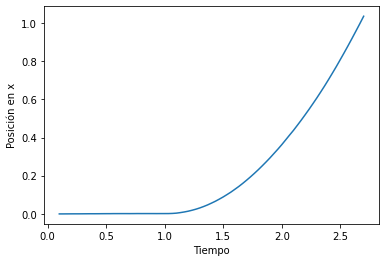

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo csv con genfromtxt
data = np.genfromtxt('/content/drive/MyDrive/UNAL/01. Pregrado Física/Semestre 6/Herramientas Computacionales/2023-I - William Oquendo/Clase 6/Trabajo en grupo/datos-carro-1d.csv', delimiter=',', skip_header=7,skip_footer=2,missing_values=np.nan)
#data = np.genfromtxt('/content/drive/MyDrive/docs/HerrComp/datos-carro-1d.csv', delimiter=',', skip_header=7,skip_footer=2,missing_values=np.nan)
# data = np.ma.array(data, mask=np.isnan(data)) # Use a mask to mark the NaNs

# Obtener los datos de tiempo y posición en x
tiempo = data[:, 0]
posicion_x = data[:, 1]

# Graficar los datos de posición en x respecto al tiempo
plt.plot(tiempo, posicion_x)
plt.xlabel('Tiempo')
plt.ylabel('Posición en x')
plt.show()


Luego de haber generado la figura podemos identificar el tiempo inicial $t_0$ en el que empieza el movimiento cerca al primer segundo, sin embargo es necesario definir algún criterio que permita definir con algo más de precisión el momento en el cual el movimiento comienza. Usamos como criterio es verificar si el cambio de una velocidad a la medida en el tiempo posterior es menor a tres desviaciones estándar, cuando se vuelve mayor, tomamos este tiempo en el que sucede como tiempo de partida.

In [ ]:
#Encontrar el momento en que se empieza a mover

for ii in range(10, tiempo.size):
  if abs(posicion_x[ii]-posicion_x[:ii].mean())>3*posicion_x[:ii].std():
    init = ii
    break



Ahora, para realizar la regresión no lineal sobre los datos y obtener los valores y errores, podemos utilizar la biblioteca scipy de Python y la función `curve_fit()` definida para los datos posteriores al tiempo inicial usando el modelo de movimiento uniformemente acelerado con parámetros fijos $x_0$, $v_{x0}$ y $a_{x0}$.

In [ ]:
from scipy.optimize import curve_fit

# Definir la función de ajuste
def ajuste(t, x_0, v_0x, a_x):
    return x_0 + v_0x*t + 0.5*a_x*t**2

# Realizar el ajuste de curva
popt, pcov = curve_fit(ajuste, tiempo[init:], posicion_x[init:])

# Obtener los valores ajustados y los errores
x_0, v_0x, a_x = popt
err_x_0, err_v_0x, err_a_x = np.sqrt(np.diag(pcov))

Ahora que se obtuvieron los valores ajustados y los errores, graficamos la zona en la cual se realizó el ajuste y lo comparamos con los datos originales. Ponemos dentro de la gráfica los parámetros óptimos obtenidos de la regresión


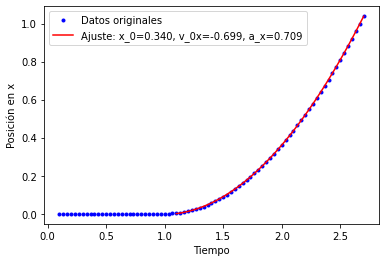

In [ ]:
# Graficar los datos originales y la función ajustada
plt.plot(tiempo, posicion_x, 'b.', label='Datos originales')
plt.plot(tiempo[init:], ajuste(tiempo[init:], *popt), 'r-', label='Ajuste: x_0=%5.3f, v_0x=%5.3f, a_x=%5.3f' % tuple(popt))
plt.xlabel('Tiempo')
plt.ylabel('Posición en x')
plt.legend()
plt.show()


Finalmente para calcular el promedio de a_x a partir de la tabla de datos y compararlo porcentualmente con lo obtenido en el ajuste, definimos dicho valor con la función `np.mean`

In [ ]:

# Calcular el promedio de a_x a partir de la tabla de datos
a_x_promedio = np.mean(data[init:, 5])

# Calcular el porcentaje de diferencia


y calculamos el porcentaje de diferencia

In [ ]:
# Calcular el porcentaje de diferencia entre el valor de la aceleración obtenido en el ajuste y el valor promedio de la tabla de datos
porcentaje_diferencia = abs(a_x - a_x_promedio) / a_x_promedio * 100

print('Posición inicial x_0 =', x_0, '+/-', err_x_0)
print('Velocidad inicial v_0x =', v_0x, '+/-', err_v_0x)
print('Aceleración a_x =', a_x, '+/-', err_a_x)
print('Valor promedio de la aceleración de la tabla de datos =', a_x_promedio)
print('Porcentaje de diferencia entre el valor de la aceleración obtenido en el ajuste y el valor promedio de la tabla de datos =', porcentaje_diferencia, '%')


Posición inicial x_0 = 0.3400225173847094 +/- 0.00298649611595423
Velocidad inicial v_0x = -0.6987845951548175 +/- 0.003274762572188574
Aceleración a_x = 0.70917958592073 +/- 0.001713067090625163
Valor promedio de la aceleración de la tabla de datos = 0.7107170142857143
Porcentaje de diferencia entre el valor de la aceleración obtenido en el ajuste y el valor promedio de la tabla de datos = 0.21632074849501393 %
